Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-nu

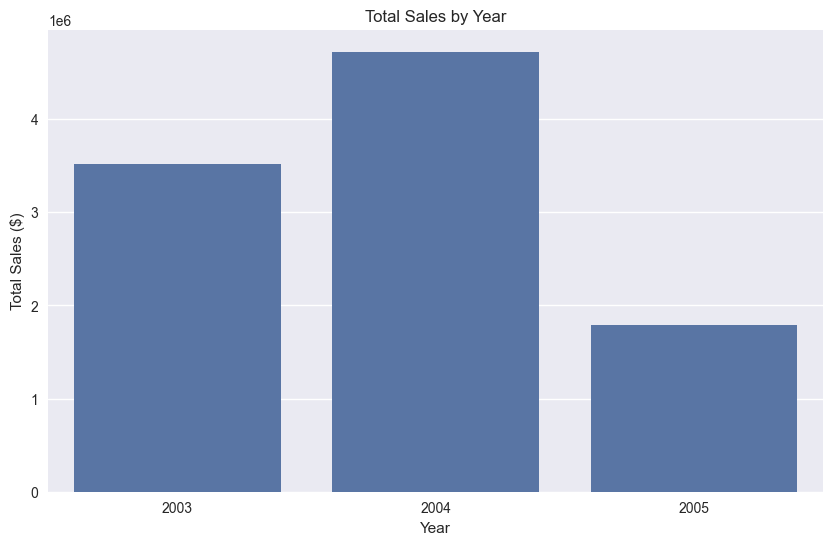

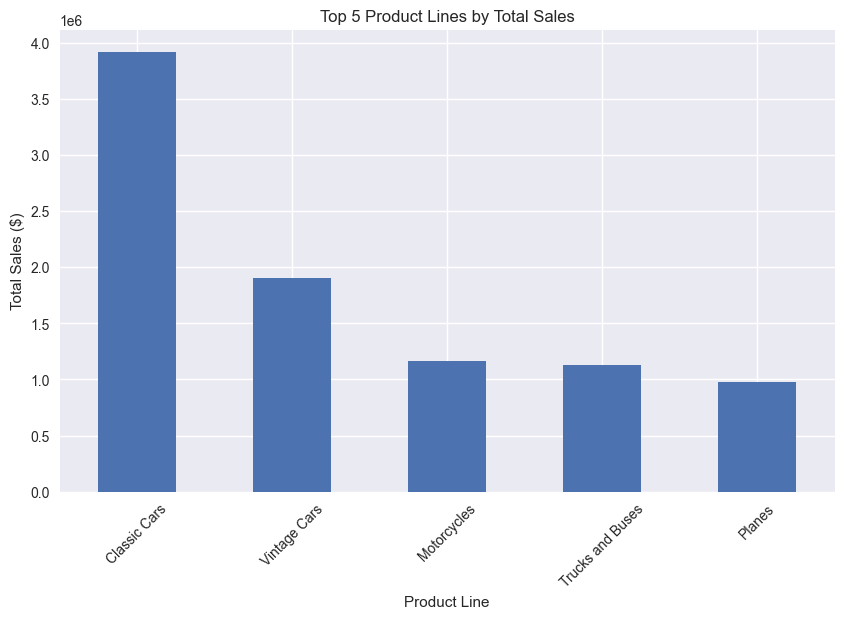

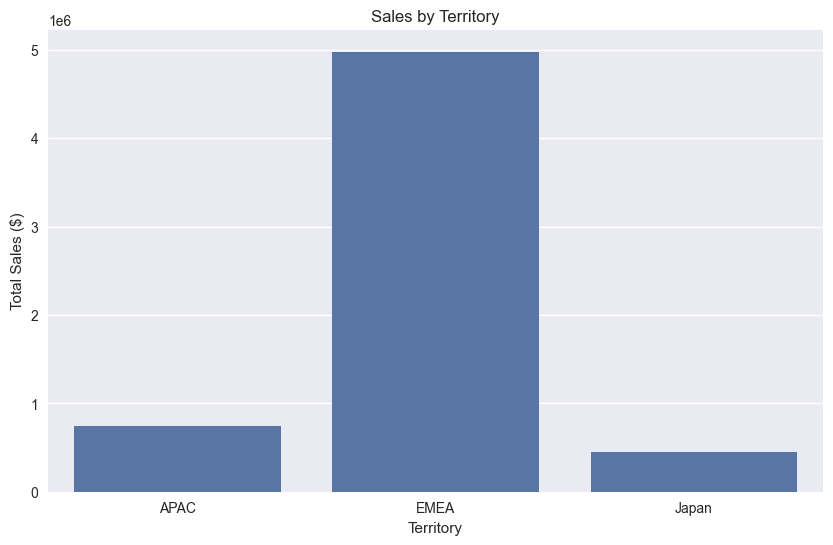

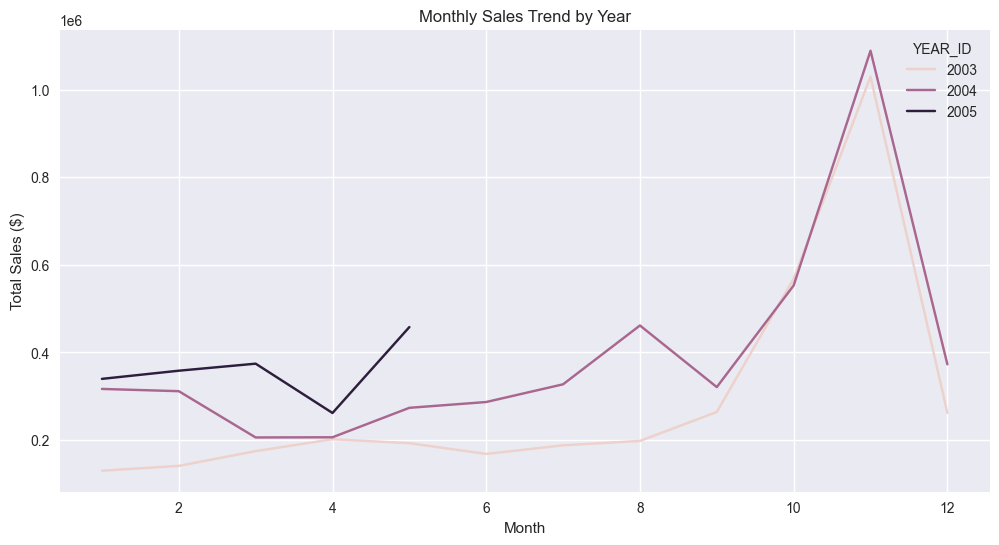

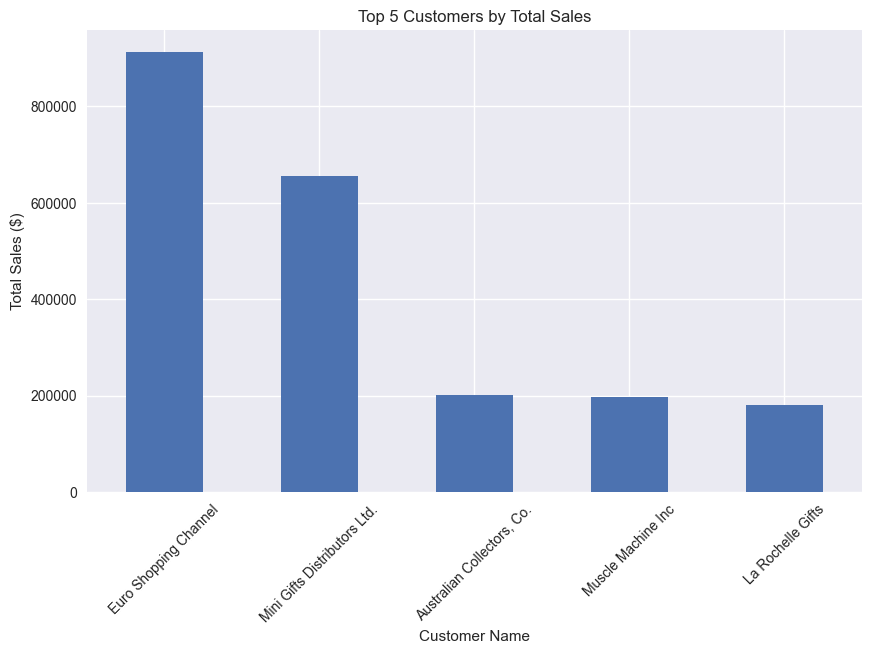

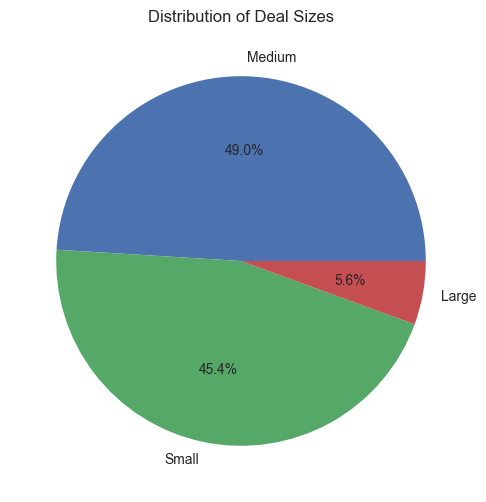

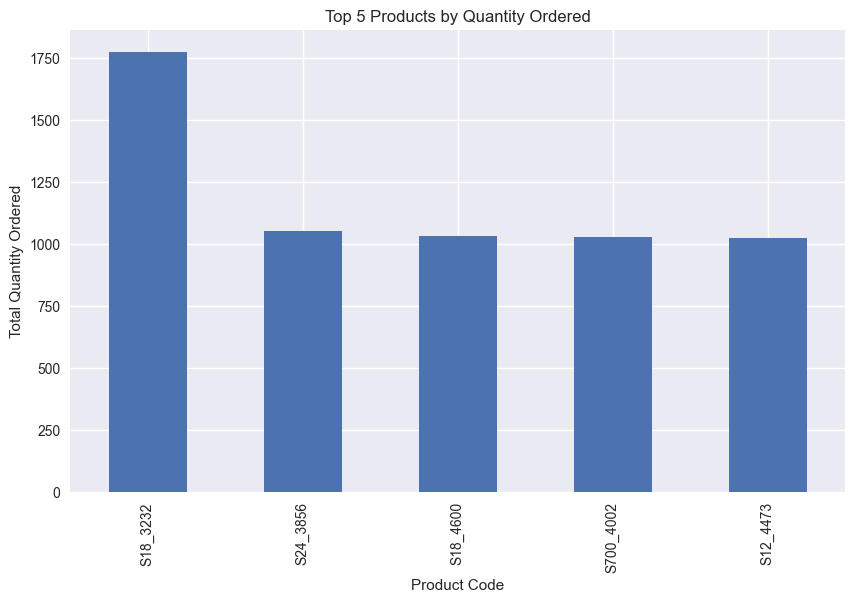


Summary Statistics:
count     2823.000000
mean      3553.889072
std       1841.865106
min        482.130000
25%       2203.430000
50%       3184.800000
75%       4508.000000
max      14082.800000
Name: SALES, dtype: float64

Top 5 Countries by Sales:
COUNTRY
USA          3627982.83
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Name: SALES, dtype: float64

Cleaned dataset saved as 'cleaned_sales_data.csv'


In [2]:
# Sales Data Analysis Case Study
# Dataset: sales_data_sample.csv from https://github.com/Pankaj-Str/Complete-Python-Mastery
# Objective: Analyze sales performance, product popularity, and customer patterns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('seaborn-v0_8')
%matplotlib inline

# 1. Load and Inspect the Data
# Reading the CSV file
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# 2. Data Cleaning
# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill missing ADDRESSLINE2 with 'Unknown'
df['ADDRESSLINE2'] = df['ADDRESSLINE2'].fillna('Unknown')

# Drop rows with missing critical columns (if any)
df = df.dropna(subset=['CUSTOMERNAME', 'SALES'])

# 3. Exploratory Data Analysis
# 3.1 Total Sales by Year
yearly_sales = df.groupby('YEAR_ID')['SALES'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='YEAR_ID', y='SALES', data=yearly_sales)
plt.title('Total Sales by Year')
plt.ylabel('Total Sales ($)')
plt.xlabel('Year')
plt.savefig('yearly_sales.png')
plt.show()

# 3.2 Top 5 Product Lines by Sales
product_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar')
plt.title('Top 5 Product Lines by Total Sales')
plt.ylabel('Total Sales ($)')
plt.xlabel('Product Line')
plt.xticks(rotation=45)
plt.savefig('top_product_lines.png')
plt.show()

# 3.3 Sales by Territory
territory_sales = df.groupby('TERRITORY')['SALES'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='TERRITORY', y='SALES', data=territory_sales)
plt.title('Sales by Territory')
plt.ylabel('Total Sales ($)')
plt.xlabel('Territory')
plt.savefig('territory_sales.png')
plt.show()

# 3.4 Monthly Sales Trend
df['MONTH'] = df['ORDERDATE'].dt.month
monthly_sales = df.groupby(['YEAR_ID', 'MONTH'])['SALES'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='MONTH', y='SALES', hue='YEAR_ID', data=monthly_sales)
plt.title('Monthly Sales Trend by Year')
plt.ylabel('Total Sales ($)')
plt.xlabel('Month')
plt.savefig('monthly_sales_trend.png')
plt.show()

# 4. Customer Analysis
# 4.1 Top 5 Customers by Sales
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar')
plt.title('Top 5 Customers by Total Sales')
plt.ylabel('Total Sales ($)')
plt.xlabel('Customer Name')
plt.xticks(rotation=45)
plt.savefig('top_customers.png')
plt.show()

# 4.2 Deal Size Distribution
deal_size_counts = df['DEALSIZE'].value_counts()
plt.figure(figsize=(8, 6))
deal_size_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Deal Sizes')
plt.ylabel('')
plt.savefig('deal_size_distribution.png')
plt.show()

# 5. Product Performance
# 5.1 Top 5 Products by Quantity Ordered
top_products = df.groupby('PRODUCTCODE')['QUANTITYORDERED'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top 5 Products by Quantity Ordered')
plt.ylabel('Total Quantity Ordered')
plt.xlabel('Product Code')
plt.savefig('top_products.png')
plt.show()

# 6. Summary Statistics
print("\nSummary Statistics:")
print(df['SALES'].describe())
print("\nTop 5 Countries by Sales:")
print(df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(5))

# 7. Save cleaned dataset
df.to_csv('cleaned_sales_data.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_sales_data.csv'")